In [7]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# force to show all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

In [55]:
# variables to find race and driver, also cut off time to take out yellow flags and pit stop laps
race_id = 5550
driver_id = 0
lap_time_cutoff = 17

In [56]:
# pull driver list from api
url = f'https://cf.nascar.com/cacher/2025/1/{race_id}/lap-times.json'
json = requests.get(url).json()
driver_list = pd.json_normalize(json['laps'])
driver_list = driver_list[['Number','FullName','Manufacturer','RunningPos']]

# find driver name
driver = pd.json_normalize(json['laps'][driver_id])
driver = driver['FullName'].iloc[0]

# find race name and location
url = 'https://cf.nascar.com/cacher/2025/race_list_basic.json'
json = requests.get(url).json()
race = pd.json_normalize(json['series_1'])
race = race[['race_id', 'track_name', 'race_name']].set_index('race_id')
race = race.loc[race_id]
location = race.values[0]
name = race.values[1]
race = name + ' @ ' + location

# find list of race ids
race_list = pd.json_normalize(json['series_1'])
race_list = race_list[['race_id', 'track_name', 'race_name']].set_index('race_id')

print(race_list)

print('\n' + driver + '\n')
print(race + '\n')
print(driver_list)

                                   track_name  \
race_id                                         
5543                      Bowman Gray Stadium   
5544           Daytona International Speedway   
5545           Daytona International Speedway   
5546           Daytona International Speedway   
5547                   Atlanta Motor Speedway   
5551                  Circuit of The Americas   
5549                          Phoenix Raceway   
5548                 Las Vegas Motor Speedway   
5583                 Homestead-Miami Speedway   
5553                    Martinsville Speedway   
5558                       Darlington Raceway   
5550                   Bristol Motor Speedway   
5555                  Talladega Superspeedway   
5554                     Texas Motor Speedway   
5557                          Kansas Speedway   
5561                North Wilkesboro Speedway   
5562                North Wilkesboro Speedway   
5563                 Charlotte Motor Speedway   
5568                

### Create lap time files for each driver  (Driver Name.csv)

In [57]:
for i in np.arange(len(driver_list)):
    
    # Get data into dataframe
    url = f'https://cf.nascar.com/cacher/2025/1/{race_id}/lap-times.json'
    json = requests.get(url).json()
    df = pd.json_normalize(json['laps'][i]['Laps'])
    
    # Find driver name to see who we're dealing with
    driver_name = pd.DataFrame(json['laps'][i])
    driver_name = driver_name['FullName'][i]
    driver_name = driver_name.lstrip('* ').rstrip(' #(i)')
    
    # Save to .csv
    driver_name_csv = './data/2025_09_Bristol/' + driver_name + '.csv'
    #df.to_csv(driver_name_csv)

    print(driver_name)

Kyle Larson
Denny Hamlin
Ty Gibbs
Chase Briscoe
Ryan Blaney
William Byron
Ross Chastain
Christopher Bell
AJ Allmendinger
Austin Dillon
Carson Hocevar
Josh Berry
Justin Haley
Kyle Busch
Chase Elliott
Brad Keselowsk
Austin Cindric
Tyler Reddick
Bubba Wallace
Ryan Preece
John Hunter Nemechek
Ricky Stenhouse Jr.
Noah Gragson
Joey Logano
Chris Buescher
Erik Jones
Zane Smith
Riley Herbst
Cole Custer
Michael McDowell
Jesse Love
Ty Dillon
Daniel Suarez
Corey LaJoie
Todd Gilliland
Cody Ware
Alex Bowman
Shane Van Gisbergen
Josh Bilick


### Summary info

In [60]:
# driver laps
# take out yellow flag laps by lap_time_cutoff
# post fixed averages
# collect lap times and filter for yellows and pit stops
race_laps = pd.json_normalize(json['laps'][driver_id]['Laps'])
race_laps_filtered = race_laps[race_laps['LapTime'] < lap_time_cutoff]

#print(race_laps_filtered.head(6))


start_pos = race_laps['RunningPos'].head(1).to_numpy()
start_pos = start_pos[0]
end_pos = race_laps['RunningPos'].tail(1).to_numpy()
end_pos = end_pos[0]

print('\n\n' + driver + ', ' + race + '\n')
print('Min Lap: ', race_laps_filtered['LapTime'].min())
print('Ave Lap: ', round(race_laps_filtered['LapTime'].astype(float).mean(), 4))
print('Max Lap: ', race_laps_filtered['LapTime'].max(), '\n')
print('Averages:\n', round(race_laps_filtered[['LapTime','LapSpeed','RunningPos']].astype(float).mean(), 4), '\n\n')
print(f'Started: P-{start_pos} \nEnded: P-{end_pos}')



Kyle Larson, Food City 500 @ Bristol Motor Speedway

Min Lap:  15.386
Ave Lap:  15.9082
Max Lap:  16.635 

Averages:
 LapTime        15.9082
LapSpeed      120.6371
RunningPos      1.6330
dtype: float64 


Started: P-3 
Ended: P-1


---

## plotly chart: tire degredation with cleaned lap data

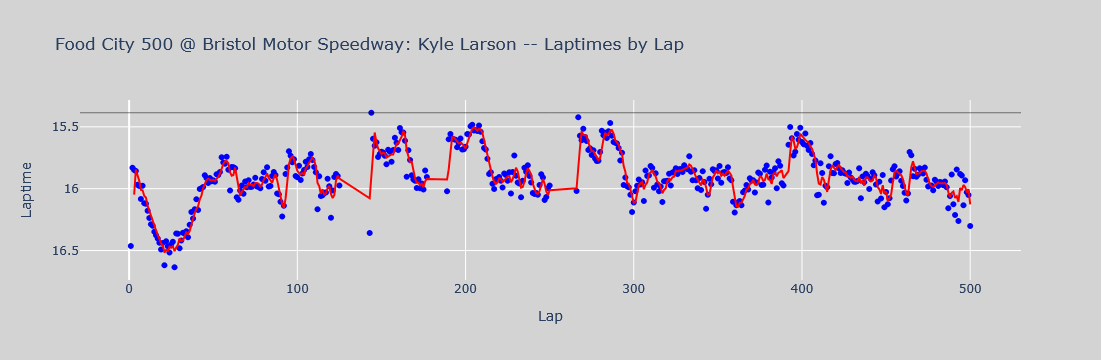

In [61]:
laptime = race_laps_filtered['LapTime']
lap = race_laps_filtered['Lap']
title = race + ': ' + driver



fig = px.scatter(x=lap, y=laptime, title=title + ' -- Laptimes by Lap', labels={'x':'Lap','y':'Laptime'}, trendline='rolling', trendline_options=dict(window=3), trendline_color_override='red')
fig.update_layout(paper_bgcolor='lightgray', plot_bgcolor='lightgray', yaxis=dict(autorange='reversed'))
fig.update_traces(marker=dict(color='blue'))
fig.add_hline(y=laptime.min(), line_width=0.5, line_color="black")
#print(fig)
fig.show()

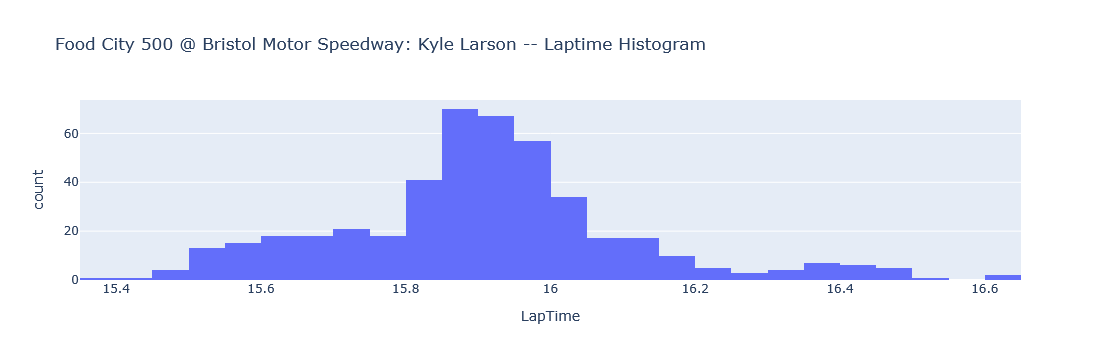

In [62]:
fig = px.histogram(race_laps_filtered, x=laptime, title=title + ' -- Laptime Histogram', labels={'x':'Lap','y':'Laptime'})
fig.show()

In [63]:
# pull lap times from api
#url = f'https://cf.nascar.com/cacher/2025/1/{race_id}/lap-times.json'
#json = requests.get(url).json()

# collect lap times and filter for yellows and pit stops
#race_laps = pd.json_normalize(json['laps'][driver_id]['Laps'])

print(driver)
print(race_laps.head())

Kyle Larson
   Lap  LapTime LapSpeed  RunningPos
0    0      NaN     None           3
1    1   16.463  116.552           5
2    2   15.831  121.205           5
3    3   15.848  121.075           5
4    4   15.856  121.014           5


In [64]:
running_position = []
running_position.append(['driver_name', 'start_pos', 'high_pos', 'low_pos', 'end_pos', 'pos_change'])

for i in np.arange(len(driver_list)):
    # pull lap times from api
    url = f'https://cf.nascar.com/cacher/2025/1/{race_id}/lap-times.json'
    json = requests.get(url).json()
    
    # collect dataframes for laps and driver name
    laps = pd.json_normalize(json['laps'][i]['Laps'])
    driver_name = pd.json_normalize(json['laps'][i])

    # put all the drivers together
    

    driver_name = driver_name['FullName'][0].lstrip('* ').rstrip('(i) #')
    start_pos = laps['RunningPos'].head(1)[0].item()
    high_pos = laps['RunningPos'].min().item()
    low_pos = laps['RunningPos'].max().item()
    end_pos = laps['RunningPos'].tail(1).to_numpy()[0].item()
    pos_change = start_pos - end_pos
    

    new_driver = [driver_name, start_pos, high_pos, low_pos, end_pos, pos_change]

    #running_position_start = np.vstack((running_position, new_driver))
    #running_position_updated = np.vstack((running_position_start, new_driver))

    running_position.append(new_driver)

print(running_position)
print(new_driver)

[['driver_name', 'start_pos', 'high_pos', 'low_pos', 'end_pos', 'pos_change'], ['Kyle Larson', 3, 1, 15, 1, 2], ['Denny Hamlin', 4, 2, 18, 2, 2], ['Ty Gibbs', 6, 3, 21, 3, 3], ['Chase Briscoe', 14, 3, 18, 4, 10], ['Ryan Blaney', 5, 1, 14, 5, 0], ['William Byron', 26, 4, 26, 6, 20], ['Ross Chastain', 35, 4, 36, 7, 28], ['Christopher Bell', 7, 3, 23, 8, -1], ['AJ Allmendinger', 8, 5, 22, 9, -1], ['Austin Dillon', 17, 4, 22, 10, 7], ['Carson Hocevar', 9, 1, 22, 11, -2], ['Josh Berry', 11, 3, 20, 12, -1], ['Justin Haley', 10, 2, 18, 13, -3], ['Kyle Busch', 15, 5, 24, 14, 1], ['Chase Elliott', 20, 5, 22, 15, 5], ['Brad Keselowsk', 16, 4, 24, 16, 0], ['Austin Cindric', 21, 16, 24, 17, 4], ['Tyler Reddick', 27, 2, 29, 18, 9], ['Bubba Wallace', 22, 3, 25, 19, 3], ['Ryan Preece', 29, 1, 30, 20, 9], ['John Hunter Nemechek', 32, 19, 35, 21, 11], ['Ricky Stenhouse Jr.', 2, 2, 27, 22, -20], ['Noah Gragson', 31, 23, 35, 23, 8], ['Joey Logano', 38, 24, 38, 24, 14], ['Chris Buescher', 24, 22, 35, 25, 

In [65]:
df = pd.DataFrame(running_position[1:], columns=running_position[0])

print(df)

             driver_name  start_pos  high_pos  low_pos  end_pos  pos_change
0            Kyle Larson          3         1       15        1           2
1           Denny Hamlin          4         2       18        2           2
2               Ty Gibbs          6         3       21        3           3
3          Chase Briscoe         14         3       18        4          10
4            Ryan Blaney          5         1       14        5           0
5          William Byron         26         4       26        6          20
6          Ross Chastain         35         4       36        7          28
7       Christopher Bell          7         3       23        8          -1
8        AJ Allmendinger          8         5       22        9          -1
9          Austin Dillon         17         4       22       10           7
10        Carson Hocevar          9         1       22       11          -2
11            Josh Berry         11         3       20       12          -1
12          

     driver_name  start_pos  high_pos  low_pos  end_pos  pos_change
0    Kyle Larson          3         1       15        1           2
1   Denny Hamlin          4         2       18        2           2
2       Ty Gibbs          6         3       21        3           3
3  Chase Briscoe         14         3       18        4          10
4    Ryan Blaney          5         1       14        5           0


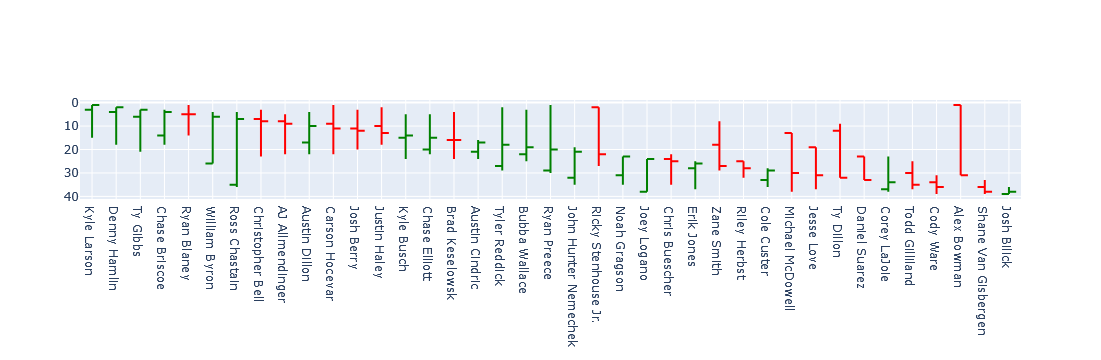

In [66]:
print(df.head())

fig = go.Figure(data=go.Ohlc(x=df['driver_name'], open=df['start_pos'], high=df['low_pos'], low=df['high_pos'], close=df['end_pos'], increasing={'line': {'color': 'red'}}, decreasing={'line': {'color': 'green'}}))
fig.update(layout_xaxis_rangeslider_visible=False)
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()

In [67]:
print(df.head())

     driver_name  start_pos  high_pos  low_pos  end_pos  pos_change
0    Kyle Larson          3         1       15        1           2
1   Denny Hamlin          4         2       18        2           2
2       Ty Gibbs          6         3       21        3           3
3  Chase Briscoe         14         3       18        4          10
4    Ryan Blaney          5         1       14        5           0


In [68]:
# bar chart start vs finish positions

clrs = ['red' if (x < 0) else 'green' for x in df['pos_change'].astype(int) ]



fig = px.bar(x=df['driver_name'], y=df['pos_change'], title="Position Change: Start vs Finish -- Food City 500", labels={"x": "Driver Starting Position", "y": "Position Change"})
fig.update_layout(paper_bgcolor='lightgray', plot_bgcolor='lightgray', yaxis={'tickmode':'linear', 'tick0':-30, 'dtick':5})
fig.update_traces(marker_color=clrs)
fig.update_xaxes(tickangle=-90)
fig.add_hline(y=0, line_width=0.5, line_color="black")
fig.show()

In [69]:
print(race_laps_filtered.head(5))
laps = race_laps_filtered['Lap']
lap_time = race_laps_filtered['LapTime']
run_pos = race_laps_filtered['RunningPos']


fig = go.Figure()
fig.add_bar(x=laps, y=run_pos)
fig.add_trace(go.Scatter(x=laps, y=lap_time, mode='lines'))
fig.update_yaxes(autorange='reversed')
fig.show()

   Lap  LapTime LapSpeed  RunningPos
1    1   16.463  116.552           5
2    2   15.831  121.205           5
3    3   15.848  121.075           5
4    4   15.856  121.014           5
5    5   15.969  120.158           5
